In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [2]:
cal1 = np.loadtxt("data/simple/calibracion_1ms.dat")
cal2 = np.loadtxt("data/simple/calibracion_2ms.dat")
cal5 = np.loadtxt("data/simple/calibracion_5ms.dat")
rabi = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")

### Graficamos los datos de calibración

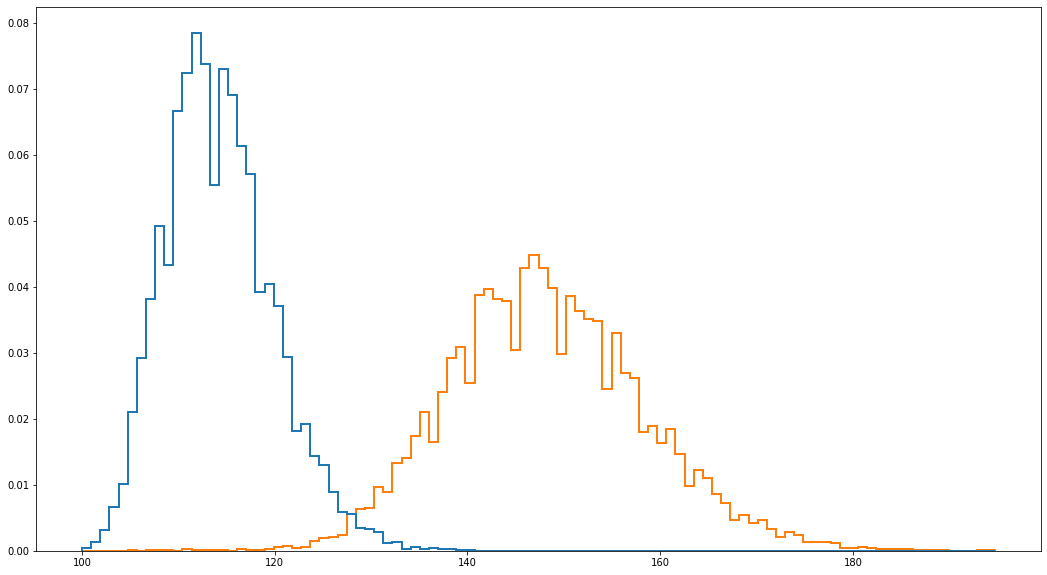

In [10]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal1, bins=100, histtype="step", linewidth=2, density=True)
plt.show()

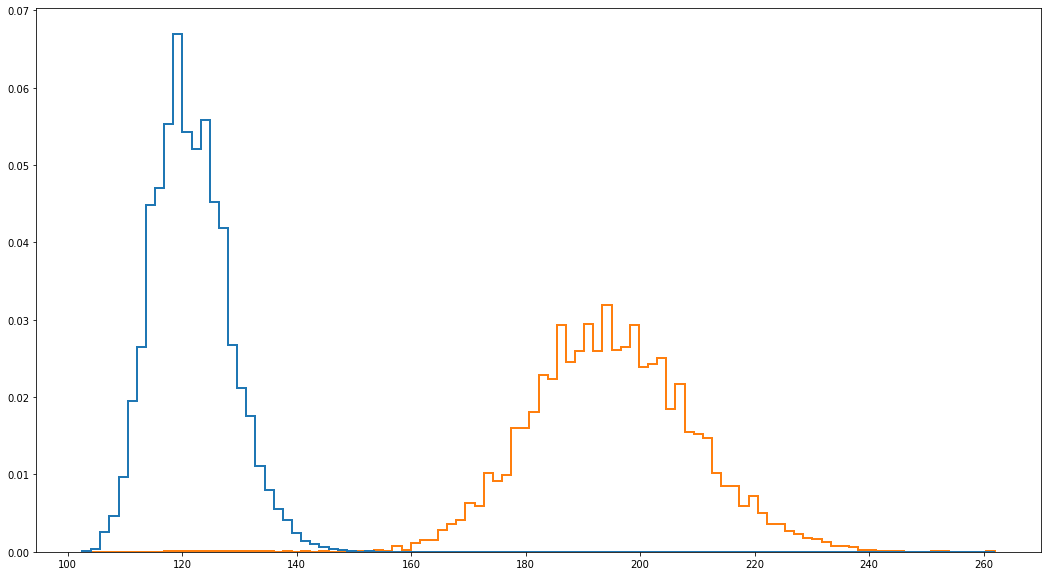

In [11]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

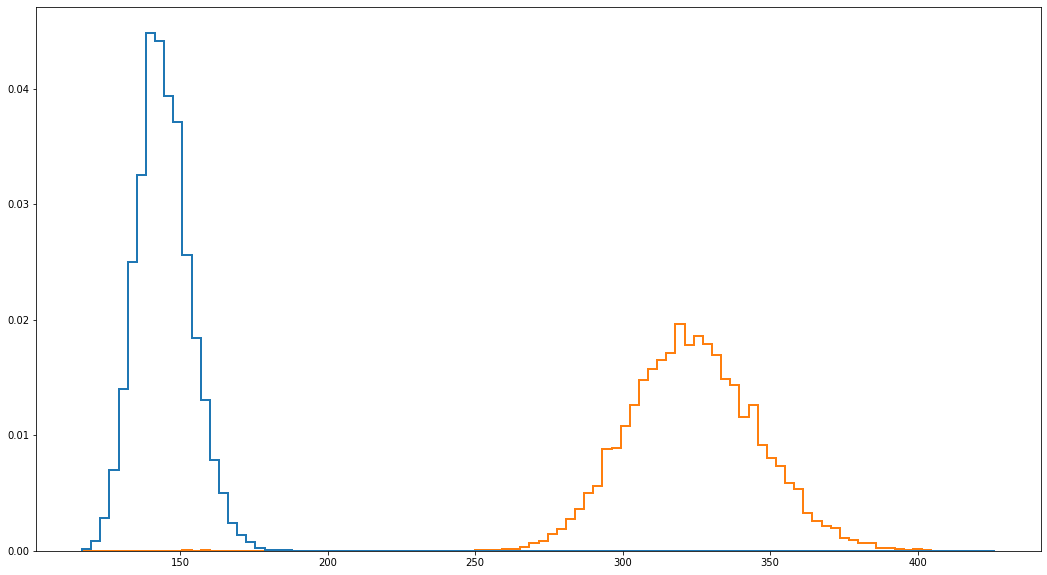

In [12]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal5, bins=100, histtype="step", linewidth=2, density=True)
plt.show()

### Defino dist de Poisson y factorial

In [101]:
def factorial(arr):
    salida = np.ones(arr.shape[0])
    for index, num in enumerate(arr):
        for i in range(1, num+1):
            salida[index] *= i
    return salida

def poisson_mio(datos, lmb):
    num =  np.exp(-lmb) * lmb**datos
    den = factorial(datos)
    return num/den



# Fitteamos Poisson a mano para la calibración 5

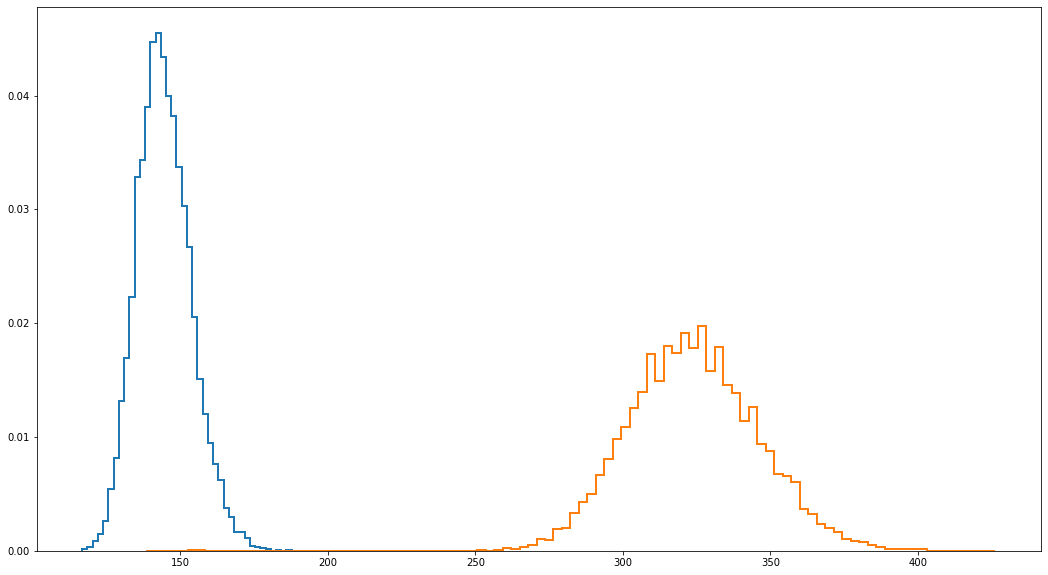

In [3]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
n0, bins0, patches0 = ax.hist(cal5[:,0], bins=40, histtype="step", linewidth=2, density = True)
n1, bins1, patches1 = ax.hist(cal5[:,1], bins=100, histtype="step", linewidth=2, density=True)
plt.show()

1.0


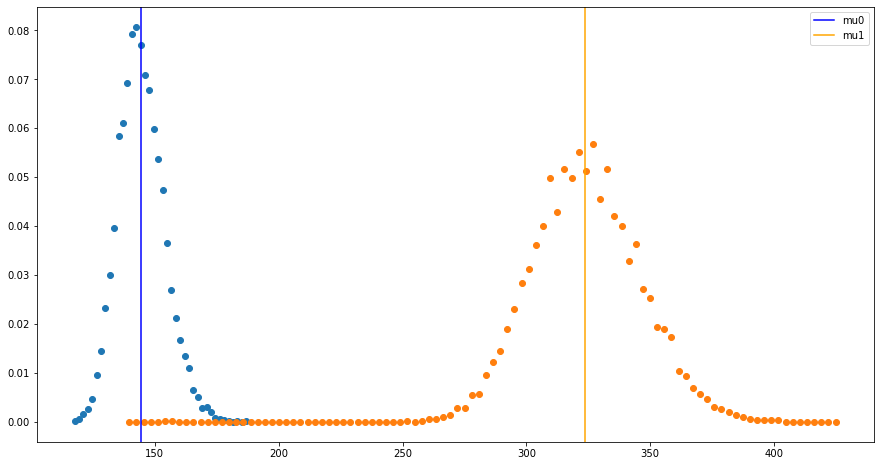

In [4]:
x0 = bins0[:-1] + np.diff(bins0)/2
x1 = bins1[:-1] + np.diff(bins1)/2
y0 = n0*np.diff(bins0)
y1 = n1*np.diff(bins1)

print(np.sum(n0*np.diff(bins0)))
#print(sum(y0), sum(y1))
mu0 = np.sum(x0*y0)
mu1 = np.sum(x1*y1)



fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x0, y0, 'o')
plt.plot(x1, y1, 'o')
plt.axvline(mu0, color="blue",label="mu0")
plt.axvline(mu1, color="orange",label="mu1")
plt.legend()
plt.show()

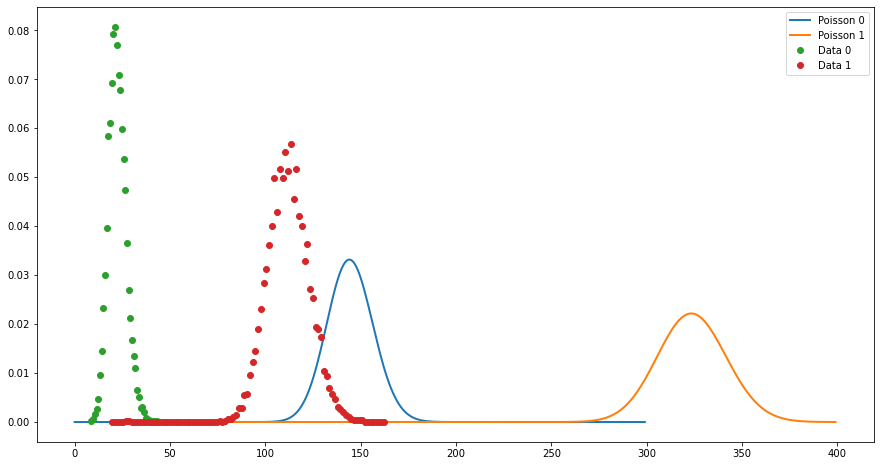

(144.57561, 323.853328)

In [6]:
#%matplotlib widget


x_poisson0 = np.arange(0, 300, 1, dtype=int)
x_poisson1 = np.arange(75, 400, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)
scale_x =1/2
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8),facecolor = 'w')

ax.plot(x_poisson0, poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)
ax.plot()

ax.plot((x0-offset)*scale_x , y0, 'o', label="Data 0")
ax.plot((x1-offset)*scale_x, y1, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion5.png')
plt.show()
mu0, mu1

# Fitteamos Poisson a mano para la medición 2

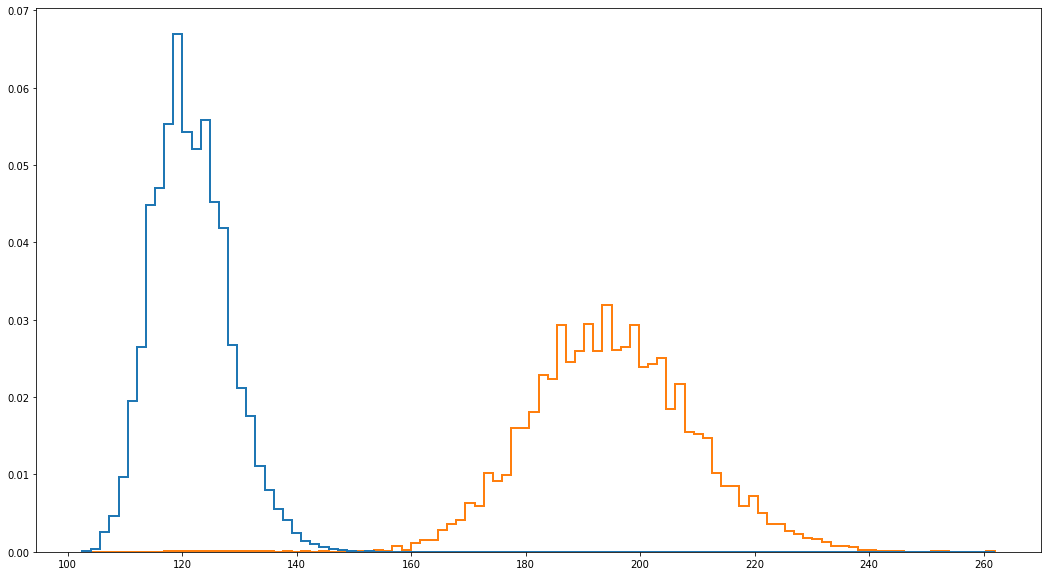

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

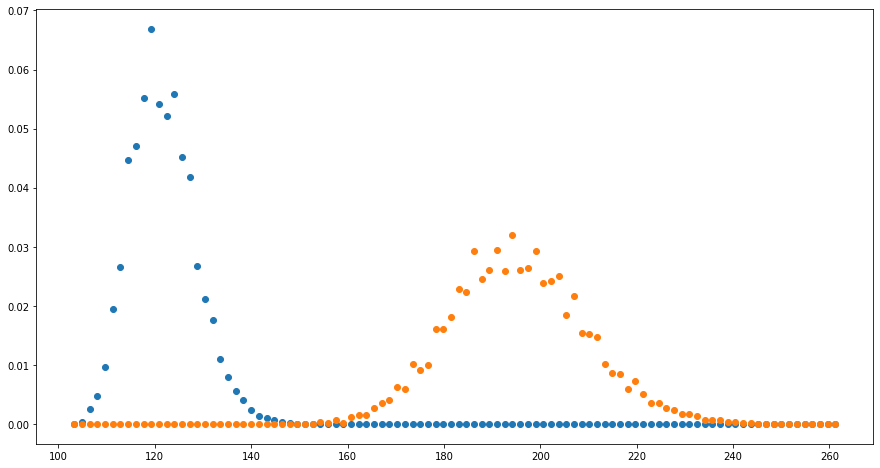

In [12]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

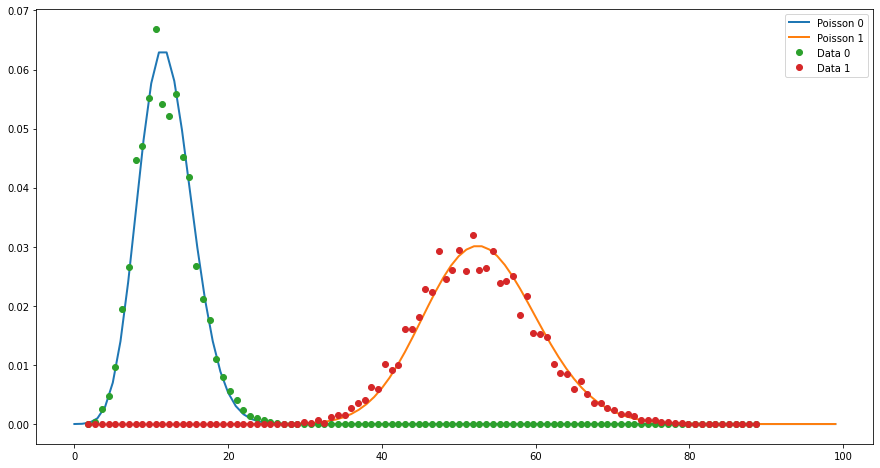

In [13]:
mu0 = 12
mu1 = 53
x_poisson0 = np.arange(0, 100, 1, dtype=int)
x_poisson1 = np.arange(20, 100, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
# sum1 = 0
# sum2 = 0
# for i in range(len(n0)):
#     sum1 += n0[i]*np.diff(bins)[i]
#     sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2
escala_y =1
scale_y = 1
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0/escala_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/escala_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()


# Ajuste de calibración 1

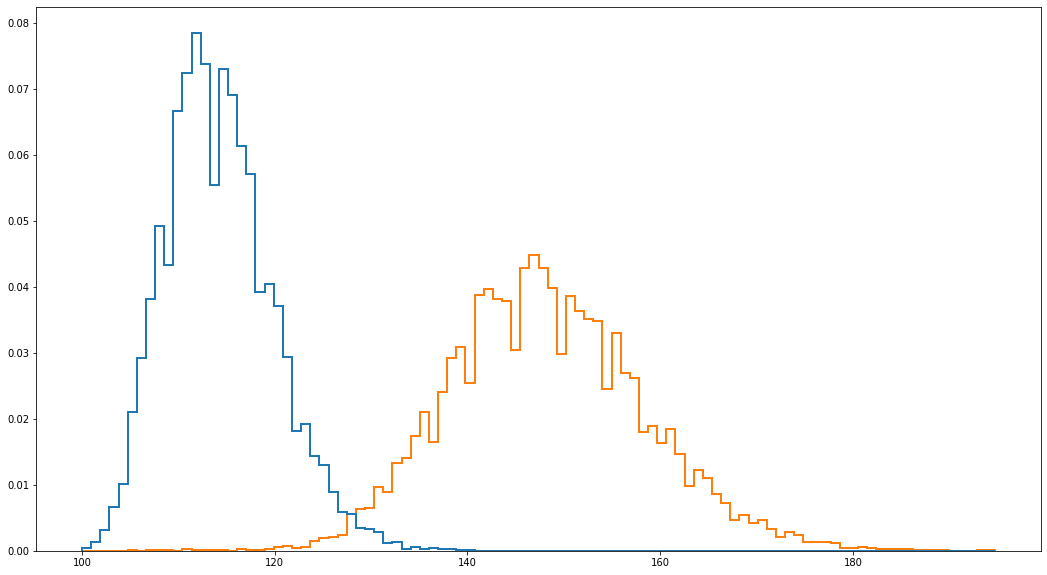

In [14]:
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal1, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1


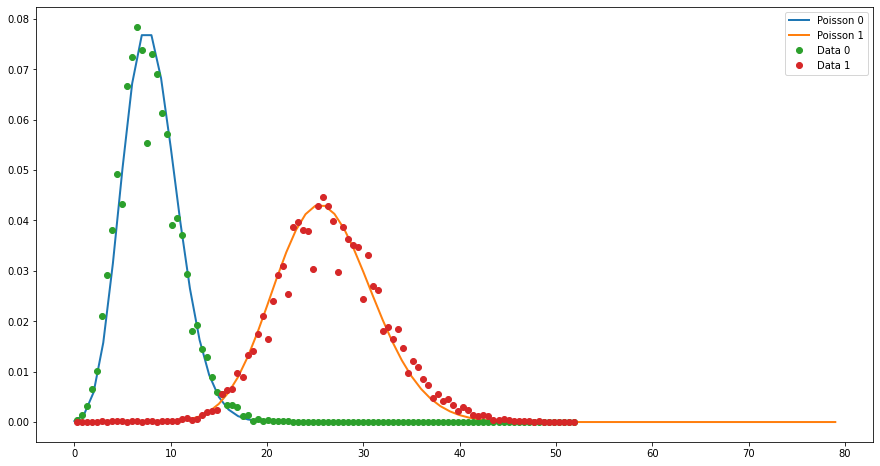

In [15]:
mu0 = 8
mu1 = 26
x_poisson0 = np.arange(0, 32, 1, dtype=int)
x_poisson1 = np.arange(10, 80, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
sum1 = 0
sum2 = 0
for i in range(len(n0)):
    sum1 += n0[i]*np.diff(bins)[i]
    sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2
escala_y = 1
scale_y = escala_y
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0/escala_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/escala_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()

# Histograma todos los graficos y valores medios

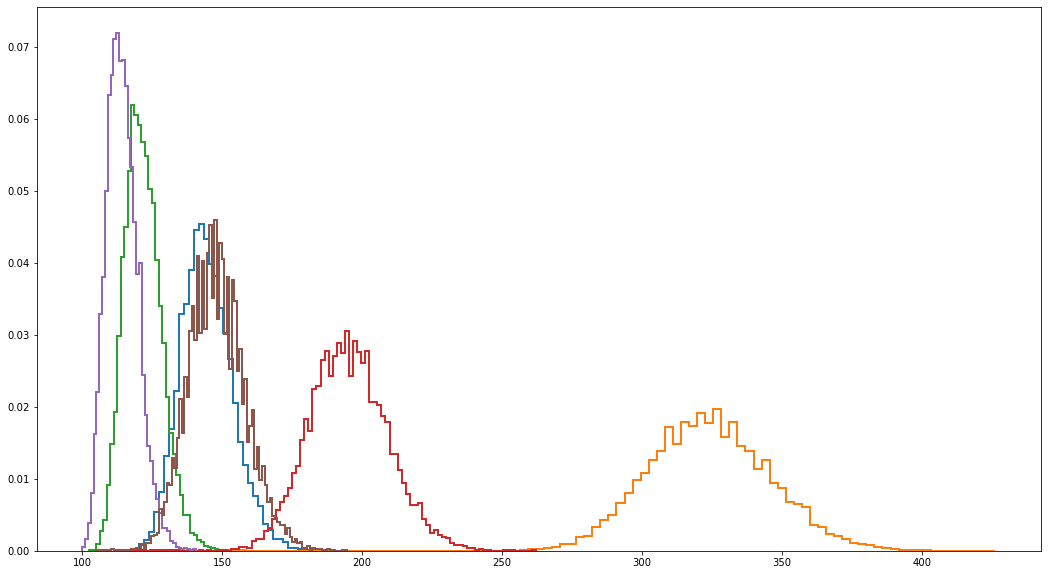

In [36]:
m50 = cal5[:,0]
m51 = cal5[:,1]
m20 = cal2[:,0]
m21 = cal2[:,1]
m10 = cal1[:,0]
m11 = cal1[:,1]


%matplotlib inline

fig, ax = plt.subplots(1, figsize=(18,10))

n50, bins50, patches50 = ax.hist(cal5[:,0], bins=40, histtype="step", linewidth=2, density = True)
n51, bins51, patches51 = ax.hist(cal5[:,1], bins=100, histtype="step", linewidth=2, density=True)

n20, bins20, patches20 = ax.hist(cal2[:,0], bins=40, histtype="step", linewidth=2, density = True)
n21, bins21, patches21 = ax.hist(cal2[:,1], bins=100, histtype="step", linewidth=2, density=True)

n10, bins10, patches10 = ax.hist(cal1[:,0], bins=40, histtype="step", linewidth=2, density = True)
n11, bins11, patches11 = ax.hist(cal1[:,1], bins=100, histtype="step", linewidth=2, density=True)


x50 = bins50[:-1] + np.diff(bins50)/2
x51 = bins51[:-1] + np.diff(bins51)/2
x20 = bins20[:-1] + np.diff(bins20)/2
x21 = bins21[:-1] + np.diff(bins21)/2
x10 = bins10[:-1] + np.diff(bins10)/2
x11 = bins11[:-1] + np.diff(bins11)/2

y50 = n50*np.diff(bins50)
y51 = n51*np.diff(bins51)
y20 = n20*np.diff(bins20)
y21 = n21*np.diff(bins21)
y10 = n10*np.diff(bins10)
y11 = n11*np.diff(bins11)

mu50 = np.sum(x50*y50)
mu51 = np.sum(x51*y51)
mu20 = np.sum(x20*y20)
mu21 = np.sum(x21*y21)
mu10 = np.sum(x10*y10)
mu11 = np.sum(x11*y11)

plt.show()

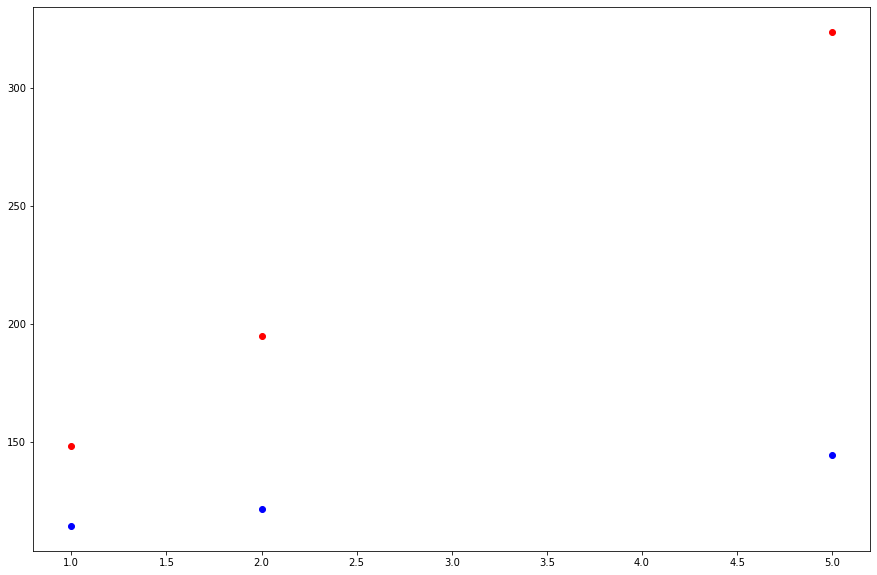

(array([  7.57795907, 106.654669  ]), array([ 43.68448033, 105.89624563]))

In [37]:
from scipy.optimize import curve_fit
def lineal(x,a,b):
    return a*x+b
t = [1, 2, 5]
mus0 = [mu10, mu20, mu50]
mus1 = [mu11, mu21, mu51]

popt1, pcov1 = curve_fit(lineal, t, mus0)
popt2, pcov2 = curve_fit(lineal, t, mus1)

plt.figure(figsize=(15,10), facecolor = 'w')
plt.plot(t, mus0, 'ob')
plt.plot(t, mus1, 'or')
plt.show()

popt1, popt2

Vemos que la cantidad de cuentas promedio es lineal con el tiempo de exposición de la cámara. Queremos que la cantidad de cuentas de la cámara sea igual a la cantidad de fotones que mide la cámara. La cámara puede tener un offset y un factor de escala.
El factor de escala lo que hace es multiplicar cada cuenta de un foton por un factor $\epsilon$, entonces si a la cámara entran $n$ fotones, la cantidad de cuentas que vamos a medir es $x=n\epsilon$. 
Otra cosa que puede pasar es que haya un ruido constante por el instrumento o luz externa o etc, y eso lo que hace es agregar un offset $k$ a la medición, es decir, si a la cámara entran $n$ fotones, nosotros vamos a medir $x=n+k$ cuentas.

Si tenemos en cuenta ambos fenómenos entonces la cantidad de cuentas en función de los fotones es
$$x = n*\epsilon+k$$
Entonces, despejando $n$ de esta ecuación queda que la cantidad de fotones que entran a la cámara son 
$$n = \frac{1}{\epsilon}(x-k).$$
Redefiniendo
$$n = a  x - b$$ 

Entoces. Sabemos que la probabildad de que el átomo emita un foton sigue una distribución poissoneana que depende de si el fotón está apagado o prendido, entonces la probabilidad de que el átomo emita $k$ fotones es 
$$P(k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

Entonces, nosotros tenemos $P(x)$, es decir, la probabilidad de medir $x$ cuentas y queremos obtener $P(n)$, o sea, la probabilidad de medir $n$ fotones. Entonces, la probabilidad debería ser la siguiente
$$P(n) = \frac{e^{-\lambda} \lambda^n}{n!} = \frac{e^{-\lambda} \lambda^{a  x - b}}{(a  x - b)!}$$

Entonces probamos hacer esto con un solo histograma, por ejemplo con el de cal5[:,1]

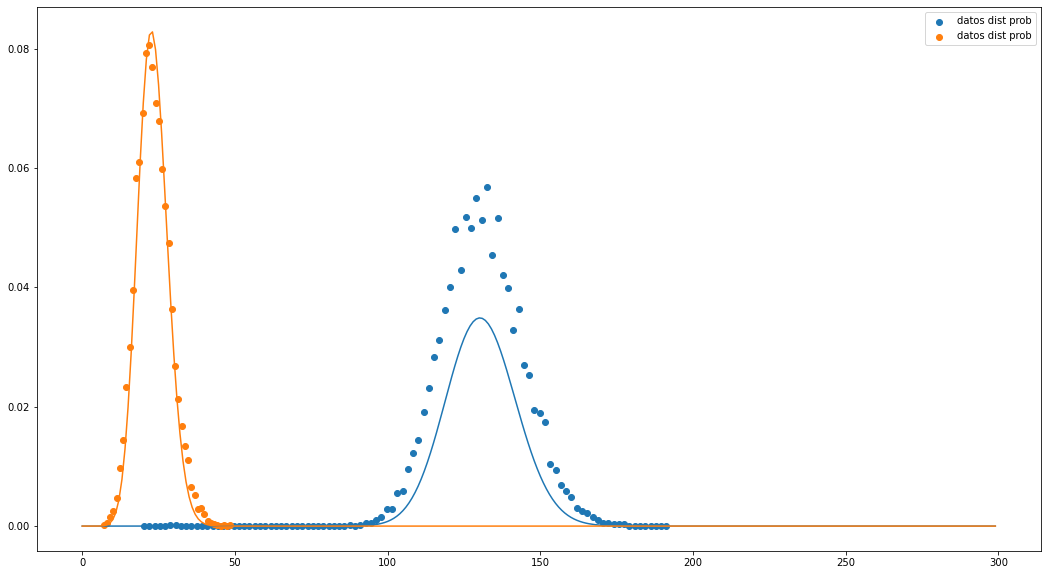

0.9999999999999569

In [75]:
m51 = cal5[:,1]

fig, ax = plt.subplots(1, figsize=(18,10), facecolor = 'w')

#n51, bins51, patches51 = ax.hist(cal5[:,1], bins=80, histtype="step", linewidth=2, density=True)

offset = 106
escala = 0.6
x51 = bins51[:-1] + np.diff(bins51)/2
x51 = (x51-offset)*escala
x50 = bins50[:-1] + np.diff(bins50)/2
x50 = (x50-offset)*escala

y50 = n50*np.diff(bins50)
y51 = n51*np.diff(bins51)


mu50 = np.sum(x50*y50)
mu51 = np.sum(x51*y51)

ax.scatter(x51, y51, label="datos dist prob")
ax.scatter(x50, y50, label="datos dist prob")

x_pois = np.arange(0, 300,1 ,dtype=int)
plt.plot(x_pois, poisson.pmf(x_pois, mu51))
plt.plot(x_pois, poisson.pmf(x_pois, mu50))

ax.legend()
plt.show()
np.sum(poisson.pmf(x_pois, mu51))